## Observations and Insights 

In [1]:
## Look across all previously generated figures and tables and write at least three observations
## or inferences that can be made from the data. Include these observations at the top of notebook.
## 


In [2]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results. Load in csv file.
mouse_metadata_df= pd.read_csv(mouse_metadata_path)
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
# Read the mouse data and the study results. Load in csv file.
study_results_df = pd.read_csv(study_results_path)
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
combined_results_df=pd.merge(mouse_metadata_df,study_results_df,how="outer",on="Mouse ID")
combined_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the DataFrame.
        # mice_instances_combined=combined_results_df["Mouse ID"].count()
        # mice_instances_combined
mouse_metadata_df.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [7]:
## DUPLICATE MOUSE IDENTIFIED ##

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows=combined_results_df[combined_results_df.duplicated()]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
## Optional: Get all the data for the duplicate mouse ID. ##

duplicate_rows=combined_results_df[combined_results_df.duplicated(keep=False)]
print("All Duplicate Rows based on all data columns is :")
print(duplicate_rows)

All Duplicate Rows based on all data columns is :
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
909                45.0                 0  


In [9]:
# Checking the number of mice 'records' in the DataFrame before dropping duplicate records.
combined_results_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [10]:
## REMOVE THE DUPLICATE MOUSE/MICE ##

# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
        #### LESSON PANDAS DAY 2 -01 ####
        #clean_combined_results_df=combined_results_df.drop_duplicates(keep='first')
        #print('Duplicate records dropped :\n', clean_combined_results_df)

clean_combined_results_df=combined_results_df.drop_duplicates(inplace=True)
print(clean_combined_results_df)

None


In [11]:
# Test to validate that the duplicate record is dropped from the dataset.
duplicate_rows=combined_results_df[combined_results_df.duplicated(keep=False)]
print("All Duplicate Rows based on all data columns is :")
print(duplicate_rows)

All Duplicate Rows based on all data columns is :
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [12]:
# Checking the number of mice 'records' in the clean DataFrame. 
# Validates that we removed the duplicate 'row' record and kept the good record.
        # NOTE:  If the duplicate records are truely duplicate in data - which they should be in order to be duplicate... 
        # The 1st record is assumed a good record. Possibly 2nd record is a keying error and thus dropped from dataset.
combined_results_df.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

In [13]:
# Checking the number of mice in the clean DataFrame.
mouse_metadata_df.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [14]:
#mouse=combined_results_df.drop([])


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# For Tumor Volume only use necessary columns
tumor_volume_df=combined_results_df.loc[:,["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]]
tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1,Ramicane,k403,5,38.825898
2,Ramicane,k403,10,35.014271
3,Ramicane,k403,15,34.223992
4,Ramicane,k403,20,32.997729
...,...,...,...,...
1888,Naftisol,z969,25,63.145652
1889,Naftisol,z969,30,65.841013
1890,Naftisol,z969,35,69.176246
1891,Naftisol,z969,40,70.314904


In [16]:
# Generate a summary statistics table
drug_regimen_df=tumor_volume_df.groupby(["Drug Regimen"])
drug_regimen_df.describe()

Timepoint                                                     \
                 count       mean        std  min   25%   50%   75%   max   
Drug Regimen                                                                
Capomulin        230.0  21.565217  14.384994  0.0  10.0  20.0  35.0  45.0   
Ceftamin         178.0  19.747191  14.283969  0.0   5.0  20.0  30.0  45.0   
Infubinol        178.0  18.174157  13.473473  0.0   5.0  15.0  30.0  45.0   
Ketapril         188.0  19.707447  14.029935  0.0   5.0  20.0  30.0  45.0   
Naftisol         186.0  19.623656  14.184814  0.0   5.0  20.0  30.0  45.0   
Placebo          181.0  18.674033  13.890798  0.0   5.0  15.0  30.0  45.0   
Propriva         160.0  16.968750  13.447977  0.0   5.0  15.0  25.0  45.0   
Ramicane         228.0  21.425439  14.275720  0.0  10.0  20.0  35.0  45.0   
Stelasyn         181.0  19.226519  13.842710  0.0   5.0  20.0  30.0  45.0   
Zoniferol        182.0  19.368132  14.384679  0.0   5.0  15.0  30.0  45.0   

             Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  160.0  52.368318  6.502160  45.000000  47.107256   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.259803  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [17]:
## DRUG REGIMEN VS. TUMOR VOLUME & TIMEPOINT SUMMARY STATISTICS TABLE ##
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_statistics_df=tumor_volume_df.groupby(["Drug Regimen","Timepoint"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
tumor_volume_statistics_df

Tumor Volume (mm3)                                  \
                                     mean     median        var       std   
Drug Regimen Timepoint                                                      
Capomulin    0                  45.000000  45.000000   0.000000  0.000000   
             5                  44.266086  45.597064   5.030889  2.242964   
             10                 43.084291  43.421014  12.344133  3.513422   
             15                 42.064317  42.798160  16.878693  4.108369   
             20                 40.716325  40.716428  19.035028  4.362915   
...                                   ...        ...        ...       ...   
Zoniferol    25                 55.432935  55.676604   5.808348  2.410052   
             30                 57.713531  57.419744   9.601024  3.098552   
             35                 60.089372  60.365832  10.876760  3.297993   
             40                 62.916692  62.274543  13.958456  3.736102   
             45                 65.960888  65.684689  14.100301  3.755037   

                                  
                             sem  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

In [18]:
## DRUG REGIMEN VS. TUMOR VOLUME SUMMARY STATISTICS TABLE ##
tumor_volume_summary=pd.DataFrame(tumor_volume_df.groupby("Drug Regimen").count())
    # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_summary=tumor_volume_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
    #tumor_volume_summary2=tumor_volume_summary[["Mouse ID", "Mean", "Median", "Variance","Standard Deviation","SEM"]]
    #tumor_volume_summary=tumor_volume_summary2.rename(columns={"Mouse ID":"Treatments"})
tumor_volume_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [19]:
## DRUG REGIMEN VS. TUMOR VOLUME SUMMARY STATISTICS TABLE OUTPUT ##

#Use groupby to create summary stats by drug regime, add results into columns in summarystats 
tumor_volume_summary_output=pd.DataFrame(tumor_volume_df.groupby("Drug Regimen").count())
tumor_volume_summary_output["Mean"] = pd.DataFrame(tumor_volume_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
tumor_volume_summary_output["Median"] = pd.DataFrame(tumor_volume_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
tumor_volume_summary_output["Variance"] = pd.DataFrame(tumor_volume_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
tumor_volume_summary_output["Standard Deviation"] = pd.DataFrame(tumor_volume_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
tumor_volume_summary_output["SEM"] = pd.DataFrame(tumor_volume_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns and rename count column 
tumor_volume_summary_output = tumor_volume_summary_output[["Mouse ID", "Mean", "Median", "Variance","Standard Deviation","SEM"]]
tumor_volume_summary_output = tumor_volume_summary_output.rename(columns={"Mouse ID":"Treatments"})

tumor_volume_summary_output


,Treatments,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,160,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

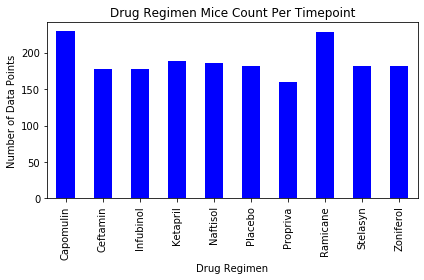

In [20]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
drug_regimen_timepoints_df=combined_results_df.groupby(["Drug Regimen"])
#drug_regimen_timepoints_df.head()

mice_count_df=drug_regimen_timepoints_df['Mouse ID'].count()
#mice_count_df

# Chart the data
chart_mice_per_drugregimen_timepoint = mice_count_df.plot(kind="bar", title="Drug Regimen Mice Count Per Timepoint",color='b',legend=False)

# Set chart labels
chart_mice_per_drugregimen_timepoint.set_xlabel("Drug Regimen")
chart_mice_per_drugregimen_timepoint.set_ylabel("Number of Data Points")
plt.tight_layout()

# Save chart to file
plt.savefig("output/pandas-bar-chart.png")

# Display output
plt.show()

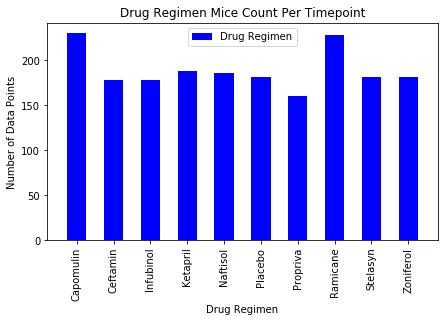

In [21]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_regimen_timepoints2_df=combined_results_df.groupby(["Drug Regimen"])
#drug_regimen_timepoints2_df.head()

mice_count2_df=drug_regimen_timepoints2_df['Mouse ID'].count()
x_axis=np.arange(len(mice_count2_df))
tick_locations2=[value for value in x_axis]

# Chart the data
plt.figure(figsize=(7,4))
plt.bar(x_axis, mice_count2_df, color = 'blue', align='center', width=0.52)
plt.xticks(tick_locations2, list(mice_count2_df.index), rotation="vertical")
 
# Set limits 
plt.xlim(-0.8,len(x_axis)-0.2)
 
# Set a Title and labels 
plt.title("Drug Regimen Mice Count Per Timepoint")
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Data Points") 
column_name=["Drug Regimen"] 
plt.legend(column_name,loc="best") 

# Save chart to file 
plt.savefig("output/pyplot-bar-chart.png") 

# Display output
plt.show()        

## Pie Plots

In [22]:
# gender=combined_results_df.groupby('Sex')
gender_counts=combined_results_df["Sex"].value_counts()
gender_counts

Male      958
Female    934
Name: Sex, dtype: int64

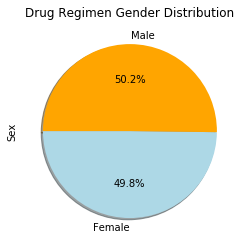

In [23]:
## Generate a pie plot showing the distribution of female versus male mice using pandas - OUTPUT ##
combined_results_df.groupby('Sex')["Mouse ID"].nunique().plot(kind='pie',title="Drug Regimen Gender Distribution",autopct='%1.1f%%',shadow=True, startangle=180, colors=["lightblue","orange"])
plt.ylabel('Sex')

# Save chart to file 
plt.savefig("output/pandas-pie-chart.png") 


In [24]:
# gender=combined_results_df.groupby('Sex')
gender_counts=combined_results_df["Sex"].value_counts()
gender_counts

Male      958
Female    934
Name: Sex, dtype: int64

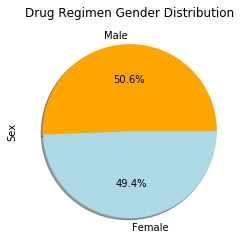

In [25]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot - OUTPUT ##
gender=list(gender_counts.index.values)
colors=['orange','lightblue']
plt.pie(gender_counts,autopct='%1.1f%%',labels=gender, colors=colors,shadow=True,startangle=0)

plt.title('Drug Regimen Gender Distribution')
plt.ylabel('Sex')

# Save chart to file 
plt.savefig("output/pyplot-pie-chart.png") 

plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Grab just data for the 4 smallest mean tumor volume regimens
filtered_df = combined_results_df.loc[(combined_results_df["Drug Regimen"] == "Capomulin") | (combined_results_df["Drug Regimen"] == "Ramicane") | (combined_results_df["Drug Regimen"] == "Ceftamin") | (combined_results_df["Drug Regimen"] == "Propriva"), :] 
 
# Sort by Timpepoints based on the latest values 
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

In [27]:
# Dropping duplicates, keeping first value, should be the latest timepoint per mouse 
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first') 

In [28]:
# Determine quartiles 
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25] 
upperq = quartiles[0.75] 
iqr = upperq-lowerq

# Determine upper and lower bounds 
lower_bound = lowerq - (1.5*iqr) 
upper_bound = upperq + (1.5*iqr)

In [29]:
# Print a filtered dataframe of any outliers 
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)' ] < lower_bound), :] 
outliers_df 
 
## Did not find any outliers....

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


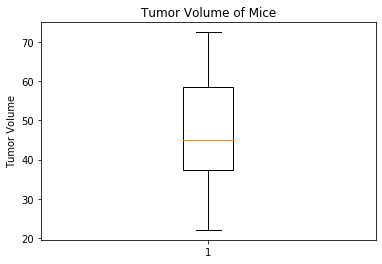

In [30]:
## Generate a box plot of the final tumor volume of each mouse across four regimens of interest - OUTPUT ##

Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume, showfliers=True)
plt.show()


## Line and Scatter Plots

In [66]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original data for just the Capomulin Drug Regime
Capomulin_df = combined_results_df.loc[(combined_results_df["Drug Regimen"] == "Capomulin"),:]

In [67]:
# Set variables to hold relevant data
timepoint = Capomulin_df["Timepoint"]
tumor_volume = Capomulin_df["Tumor Volume (mm3)"]

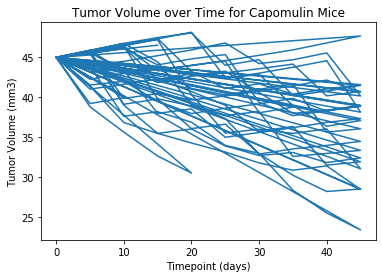

In [69]:
## Plot the tumor volume for various mice - OUTPUT ##
tumor_volume_line = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Save chart to file 
plt.savefig("output/timepoint-chart-capomulin-tumor-volume-over-time.png") 

plt.show()

In [63]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

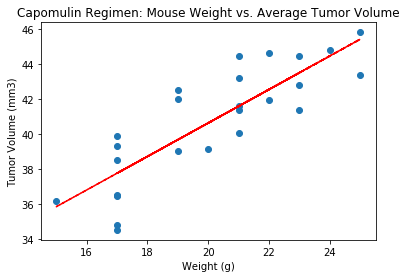

In [64]:
## Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen - OUTPUT ##
# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.title("Capomulin Regimen: Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouse_weight,fit,"--",color='r')

# Save chart to file 
plt.savefig("output/scatter-plot-chart-mouse-weight-vs-avg-tumor-volume.png") 

plt.show()

## Correlation and Regression

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Pull values for x and y values 
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

In [60]:
# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)

In [61]:
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

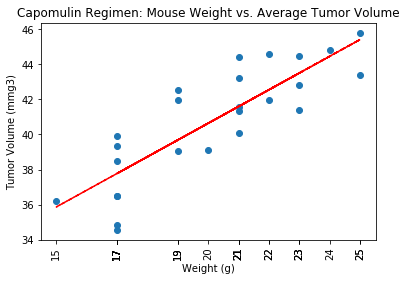

In [62]:
## Plot the linear model on top of scatter plot - OUTPUT ##
plt.scatter(mouse_weight,tumor_volume)
plt.title("Capomulin Regimen: Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mmg3)")
plt.plot(mouse_weight,fit,"--",color='r')
plt.xticks(mouse_weight, rotation=90)

# Save chart to file 
plt.savefig("output/scatter-plot-chart-linear-model.png") 

plt.show()

In [40]:
## Caculate correlation coefficient - OUTPUT ##

corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')

The correlation between weight and tumor value is 0.84


In [41]:
## EOF ##